### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Meta Data

Age| Age in years| integer |

Gender| Male or Female|integer (1 or 2)|

Bmi | Body mass index | float |

No_of_children| Number of children | integer|

Smoker| Whether smoker or not | integer (0 or 1)|

Region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 

Charges| Annual Insurance charges in USD | float|

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Processing

In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Statistical Summary Observation

### Checking missing values

In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data Statistical Observation : 

1. Age:
   - The age range in the dataset is from 18 to 64 years.
   - The average age is approximately 39 years.
   - The majority of individuals fall between the ages of 27 and 51, as indicated by the interquartile range (IQR).

2. BMI (Body Mass Index):

   - The BMI values range from 15.96 to 53.13.
   - The average BMI is around 30.66.
   - The IQR for BMI is between 26.30 and 34.69.

3. Number of Children:
   - The number of children (children column) ranges from 0 to 5.
   - The average number of children is approximately 1.09.
   - The majority of individuals have 0 to 2 children, as indicated by the IQR.

4. Insurance Charges:
   - The insurance charges (charges column) range from 1121.87 to 63770.43.
   - The average insurance charge is approximately 13270.42.
   - There is significant variability in insurance charges, as indicated by the standard deviation.


### The bmi and charges columns have outliers. These outliers are values that fall significantly outside the typical range for these columns.


BMI (Body Mass Index):

The minimum BMI in the dataset is 15.96. This value is unusually low because it falls below the typical range for healthy adults. A BMI below 18.5 is generally considered underweight.

The maximum BMI is 53.13. This value is exceptionally high and indicates extreme obesity. A BMI above 30 is typically classified as obese.

Charges (Medical Insurance Costs):

The minimum charge in the dataset is 1121.87. This value seems unusually low because it falls well below the typical range of medical charges. It’s uncommon for medical expenses to be this low.

The maximum charge is 63770.43, which is significantly higher than the other charges. Such an extreme value suggests a substantial medical expense, possibly related to a rare condition or specialized treatment.

### Data Wrangling

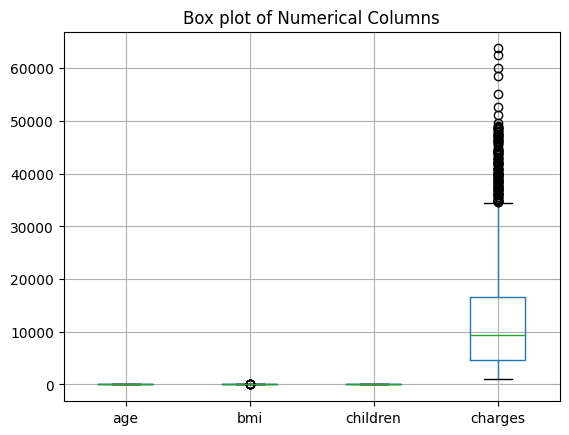

In [8]:
###Checking out outliers

data.boxplot(column=['age', 'bmi', 'children', 'charges']) 
plt.title('Box plot of Numerical Columns')
plt.show()

In [9]:
df_cleaned = data[(data['charges'] < 17500) & (data['bmi'] >= 18.5) & (data['bmi'] < 30)]
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
7,37,female,27.74,3,no,northwest,7281.5056
8,37,male,29.83,2,no,northeast,6406.4107


In [10]:
df_cleaned.describe()

,age,bmi,children,charges
count,481.000000,481.000000,481.000000,481.000000
mean,37.108108,25.668701,1.045738,7368.340526
std,13.570831,2.914274,1.232370,4261.911276
min,18.000000,18.500000,0.000000,1121.873900
25%,25.000000,23.465000,0.000000,3757.844800
50%,36.000000,26.030000,1.000000,6753.038000
75%,48.000000,28.100000,2.000000,10702.642400
max,64.000000,29.925000,5.000000,17496.306000


In [ ]:
df_cleaned[["charges"]] = np.round(data[["charges"]],2)

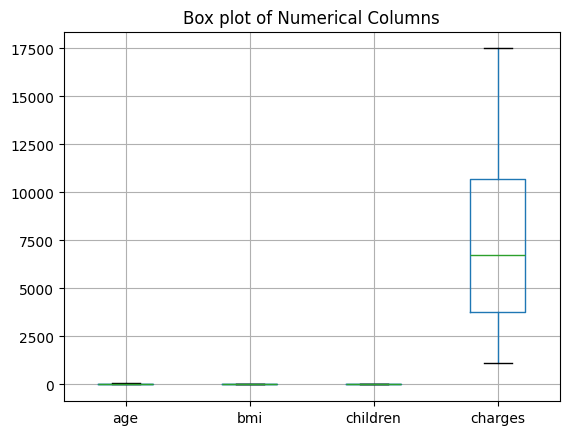

In [12]:
df_cleaned.boxplot(column=['age', 'bmi', 'children', 'charges']) 
plt.title('Box plot of Numerical Columns')
plt.show()

In [13]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
4,32,male,28.88,0,no,northwest,3866.86
5,31,female,25.74,0,no,southeast,3756.62
7,37,female,27.74,3,no,northwest,7281.51
8,37,male,29.83,2,no,northeast,6406.41


### Data Exploratory

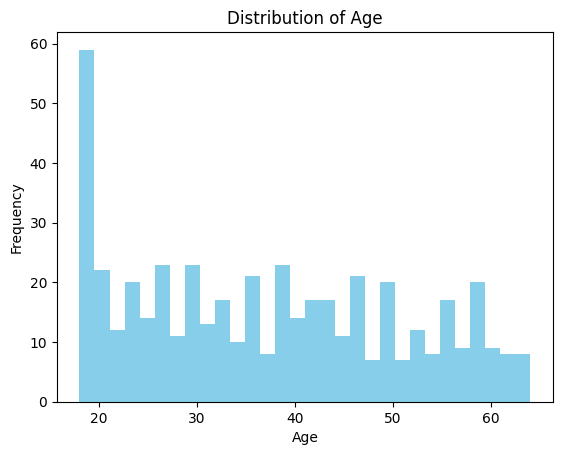

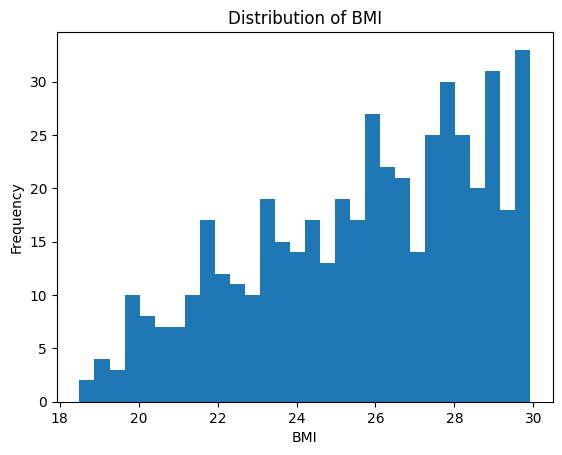

In [103]:
df_cleaned['age'].plot(kind='hist', bins=30, color='skyblue')
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

df_cleaned['bmi'].plot(kind='hist', bins=30)
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

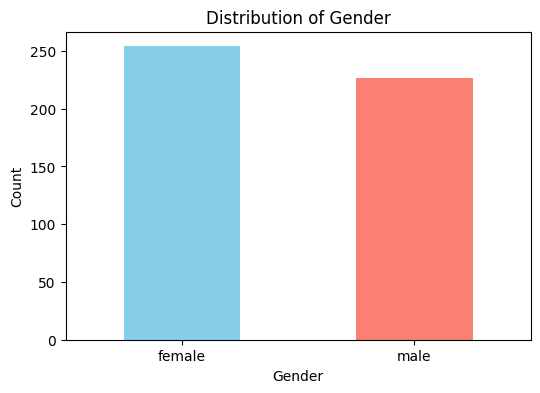

In [102]:
plt.figure(figsize=(6, 4))
df_cleaned['sex'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

<Figure size 600x400 with 0 Axes>

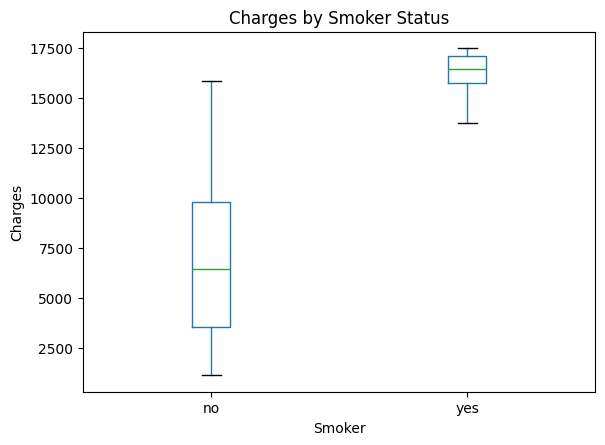

In [101]:
plt.figure(figsize=(6, 4))
df_cleaned.boxplot(column='charges', by='smoker', grid=False)
plt.title("Charges by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.suptitle("")
plt.xticks(rotation=0)
plt.show()

### They charges smokers more than non smokers

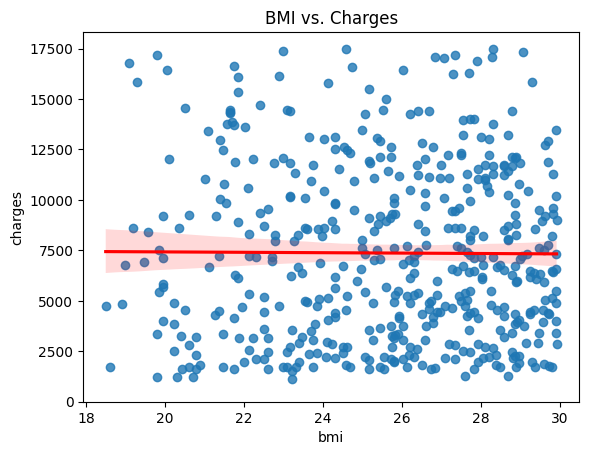

In [100]:
sns.regplot(x="bmi", y="charges", data=df_cleaned,line_kws={"color": "red"})
plt.ylim(0)
plt.title("BMI vs. Charges")
plt.show()

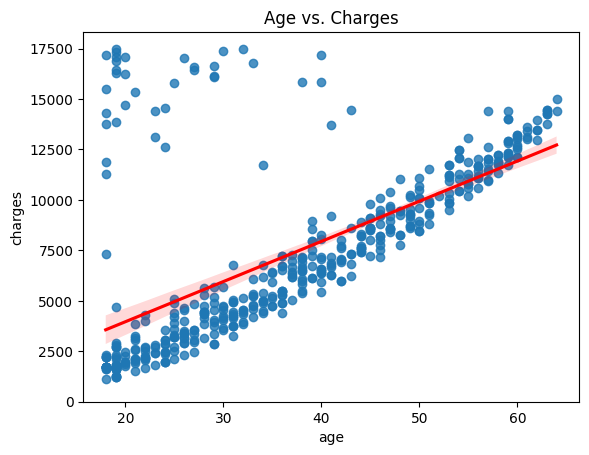

In [99]:
sns.regplot(x="age", y="charges", data=df_cleaned,line_kws={"color": "red"})
plt.ylim(0)
plt.title("Age vs. Charges")
plt.show()

### As age increases, insurance charges tend to increase.

<Figure size 800x600 with 0 Axes>

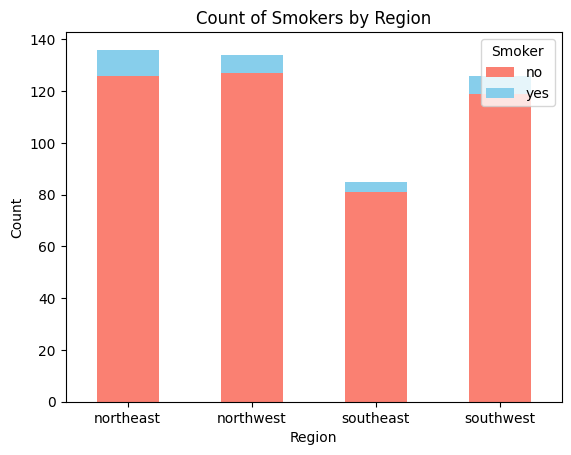

In [94]:
smokers_by_region = df_cleaned.groupby('region')['smoker'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
smokers_by_region.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'])
plt.title("Count of Smokers by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Smoker", loc='upper right')
plt.show()

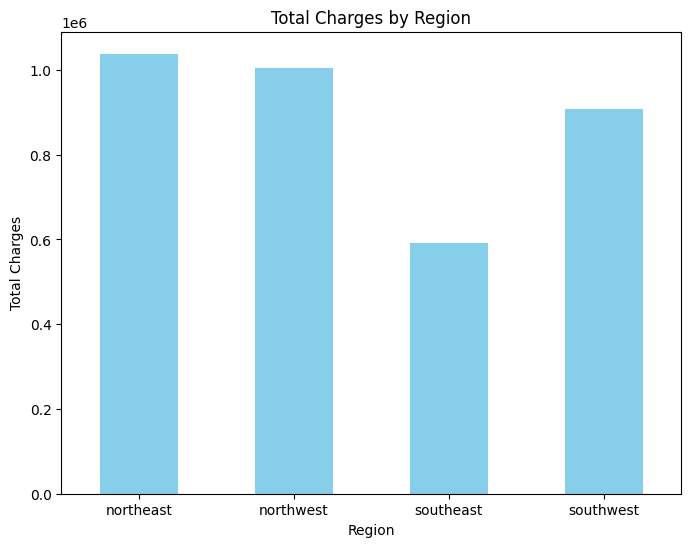

In [98]:
total_charges_by_region = df_cleaned.groupby('region')['charges'].sum()
plt.figure(figsize=(8, 6))
total_charges_by_region.plot(kind='bar', color='skyblue')
plt.title("Total Charges by Region")
plt.xlabel("Region")
plt.ylabel("Total Charges")
plt.xticks(rotation=0)
plt.show()

### Modelling

In [21]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score 

In [22]:
df_encoded = df_cleaned.copy() 
label_encoder = LabelEncoder()
df_encoded['smoker_encoded'] = label_encoder.fit_transform(df_encoded['smoker'])

In [23]:
label_encoder = LabelEncoder()
df_encoded['sex_encoded'] = label_encoder.fit_transform(df_encoded['sex'])

In [24]:
df_encoded.head()

,age,sex,bmi,children,smoker,region,charges,smoker_encoded,sex_encoded
0,19,female,27.90,0,yes,southwest,16884.92,1,0
4,32,male,28.88,0,no,northwest,3866.86,0,1
5,31,female,25.74,0,no,southeast,3756.62,0,0
7,37,female,27.74,3,no,northwest,7281.51,0,0
8,37,male,29.83,2,no,northeast,6406.41,0,1


In [25]:
df_encoded.drop(columns=['sex', 'smoker', 'region'], inplace=True)

In [26]:
df_encoded.tail(5)

,age,bmi,children,charges,smoker_encoded,sex_encoded
1316,19,20.600,0,1731.68,0,0
1319,39,26.315,2,7201.70,0,0
1324,31,25.935,1,4239.89,0,1
1330,57,25.740,2,12629.17,0,0
1336,21,25.800,0,2007.94,0,0


### Training the model

In [79]:
#feaures and target
X = df_encoded.drop(columns = ['charges'])
y = df_encoded['charges']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

### scatter plots for actual vs. predicted charges

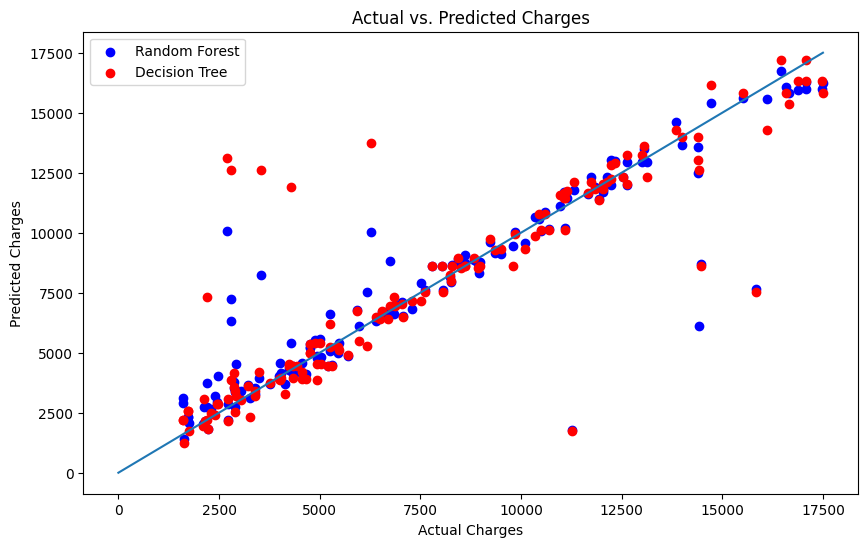

In [107]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, color='blue', label='Random Forest')
plt.scatter(y_test, dt_predictions, color='red', label='Decision Tree')

plt.plot([0, max(y_test)], [0, max(y_test)])
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.legend()
plt.show()

### Checking models generality

In [108]:
dt_rmse = mean_squared_error(y_test, dt_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
df_mae = mean_absolute_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Decision Tree RMSE: {dt_rmse:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Decision Tree MAE: {dt_mae:.2f}")
print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Decision Tree R2 Score: {dt_r2:.2f}")
print(f"Random Forest R2 Score: {rf_r2:.2f}")

Decision Tree RMSE: 4634163.77
Random Forest RMSE: 3011010.99
Decision Tree MAE: 838.85
Random Forest MAE: 833.49
Decision Tree R2 Score: 0.77
Random Forest R2 Score: 0.85


### The Random Forest model outperforms the Decision Tree model across all metrics. Lower values for MAE, MSE, and RMSE indicate better predictive performance, and a higher R-squared value suggests a better fit of the model to the data.

### Features Importance

In [38]:
from rfpimp import importances

feature_importance = importances(rf_model, X_test, y_test)
print(feature_importance)

dt_feature_importance = importances(dt_model, X_test, y_test)
print(dt_feature_importance)


                Importance
Feature                   
age               1.405897
smoker_encoded    0.763677
children          0.065557
bmi              -0.003583
sex_encoded      -0.011119
                Importance
Feature                   
age               1.280291
smoker_encoded    0.759171
children          0.173849
sex_encoded      -0.004604
bmi              -0.037171


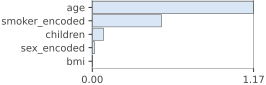

In [70]:
feature_importance = importances(rf_model, X_test, y_test)
plot_importances(feature_importance)

### Age and Smoker_encoded are the two best features importance

### Data Prediction

In [74]:
# Predicted insurance charges on the test set
rf_predictions = rf_model.predict(X_test)
print("Random Forest Predictions:", rf_predictions)

# Actual insurance charges in the test set
print("Actual Insurance Charges (y_test):")
print(y_test)


Random Forest Predictions: [13205.1718  2154.5775 10407.5814 12658.9754  1973.6851  4854.0585
  3081.6328  6708.5264  7444.8947 10152.0256 13953.38    2325.4106
 16188.6264  8739.3494  4331.3348 12059.3092  8589.73    4870.6007
 11382.1591 11517.5898  9179.7923  3604.4977  2770.2643  4093.1867
  4333.6114  1938.3349  5624.8536  9994.2641  6128.4418 16655.8999
  2067.5976  1893.7513  5099.8179  1932.8294  7066.1182  3333.9458
  8999.3883  8620.6937 15688.8604 13106.5975  5118.6357  8153.9052
  4108.3233 12443.3782  3547.2522  8752.8061  5317.302  12252.3434
  2679.8991 10575.7932  8738.2404  4509.973   3482.7467 12018.9004
  6559.2351  8633.8687  9567.1332  5301.2737 11068.638   8956.7342
 11358.0627  3533.1214  5369.182  11713.6924 11637.8689  5029.2767
 13008.8604  4384.5227  8665.3319  8191.2818  4397.6074 10636.7749
  7644.436   9813.5688  6827.261   6665.348   8922.307   2007.1837
  3037.0373  4058.4056  3625.2508  2740.718   4359.3549 10791.2072
  8230.5168 16245.6188 11876.1257  